#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pylab
from datetime import datetime, timedelta

#### Import data

In [5]:
master_data = pd.read_csv('master_springsteen_data.csv')
master_data.drop('Unnamed: 0', axis=1, inplace=True)
data = master_data

#### Create a new DataFrame called 'new_material' that only includes Springsteen albums that contained new material at the time of their release (i.e., rows in the master_springsteen_data with a "1" in the "New Material" column).

In [7]:
new_material = data[data['New Material'] != 0]
new_material = new_material.reset_index()
new_material.to_csv('new_material.csv')
new_material.drop('index', axis=1, inplace=True)

#### Plot the percentage of repeat words per song vs. time (excluding releases of old material)

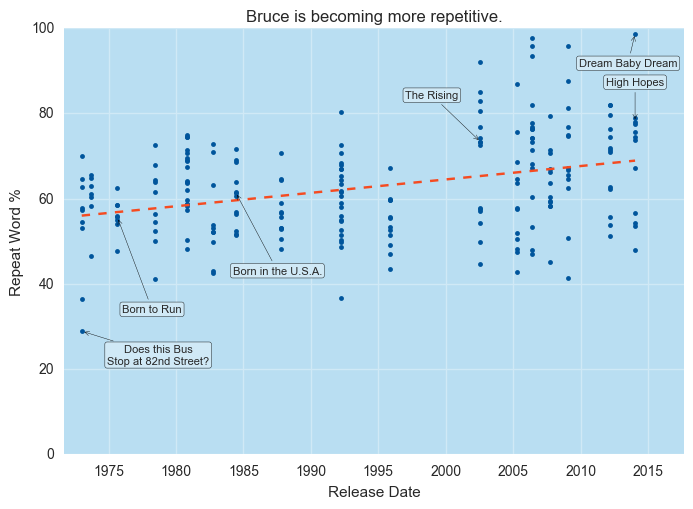

In [10]:
fig = plt.figure(1)
ax = fig.add_subplot(111, axisbg='#b9def2')
ax.grid(color = '#d0e9f6')
ax.plot_date(new_material.loc[:,'date_number'], new_material.loc[:,'percent_repeat'], color = '#00559c', marker = '.')
plt.xlim(1972*365, 2018*365); plt.ylim(0,100)

date_number_nm = new_material['date_number'].values
repeat_percent_nm = new_material['percent_repeat'].tolist()

m2,b2 = np.polyfit(date_number_nm, repeat_percent_nm, 1)
plt.plot(date_number_nm, m2*date_number_nm + b2, color = '#F54B21', linestyle = '--')

plt.title('Bruce is becoming more repetitive.')
pylab.xlabel('Release Date'); pylab.ylabel('Repeat Word %')

plt.annotate('Does this Bus\nStop at 82nd Street?', xy=(date_number_nm[3],repeat_percent_nm[3]), 
             xytext=(55,-25), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Born to Run', xy=(date_number_nm[20],repeat_percent_nm[20]), 
             xytext=(25,-70), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Born in the U.S.A.', xy=(date_number_nm[64],repeat_percent_nm[64]), 
             xytext=(30,-60), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('The Rising', xy=(date_number_nm[136],repeat_percent_nm[136]), 
             xytext=(-35,30), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('High Hopes', xy=(date_number_nm[207],repeat_percent_nm[207]), 
             xytext=(0,25), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Dream Baby Dream', xy=(date_number_nm[218],repeat_percent_nm[218]), 
             xytext=(-5,-25), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.show() 
pylab.show()

#### Plot length per song vs. time (excluding releases of old material)

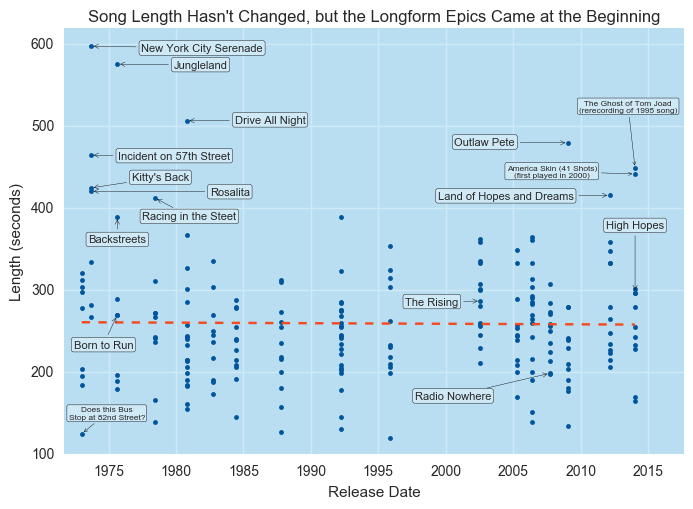

In [11]:
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111, axisbg='#b9def2')
ax2.grid(color = '#d0e9f6')
ax2.plot_date(new_material.loc[:,'date_number'], new_material.loc[:,'Length'], color = '#00559c', marker = '.')
plt.xlim(1972*365, 2018*365); plt.ylim(100,620)

#date_number_nm = new_material['date_number'].values
length_nm = new_material['Length'].tolist()

m3,b3 = np.polyfit(date_number_nm, length_nm, 1)
plt.plot(date_number_nm, m3*date_number_nm + b3, color = '#F54B21', linestyle = '--')

plt.title('Song Length Hasn\'t Changed, but the Longform Epics Came at the Beginning')
pylab.xlabel('Release Date'); pylab.ylabel('Length (seconds)')

plt.annotate('Does this Bus\nStop at 82nd Street?', xy=(date_number_nm[3],length_nm[3]), 
             xytext=(18,10), fontsize=6, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Born to Run', xy=(date_number_nm[20],length_nm[20]), 
             xytext=(-10,-25), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Rosalita', xy=(date_number_nm[14],length_nm[14]), 
             xytext=(100,-4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('The Rising', xy=(date_number_nm[136],length_nm[136]), 
             xytext=(-35,-4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('High Hopes', xy=(date_number_nm[207],length_nm[207]), 
             xytext=(0,45), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Radio Nowhere', xy=(date_number_nm[169],length_nm[169]), 
             xytext=(-70,-20), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('New York City Serenade', xy=(date_number_nm[15],length_nm[15]), 
             xytext=(80,-5), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Jungleland', xy=(date_number_nm[23],length_nm[23]), 
             xytext=(60,-4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Drive All Night', xy=(date_number_nm[52],length_nm[52]), 
             xytext=(60,-3), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Incident on 57th Street', xy=(date_number_nm[13],length_nm[13]), 
             xytext=(60,-4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Kitty\'s Back', xy=(date_number_nm[11],length_nm[11]), 
             xytext=(50,4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Racing in the Steet', xy=(date_number_nm[28],length_nm[28]), 
             xytext=(25,-17), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Outlaw Pete', xy=(date_number_nm[181],length_nm[181]), 
             xytext=(-60,-3), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Land of Hopes and Dreams', xy=(date_number_nm[203],length_nm[203]), 
             xytext=(-75,-4), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('America Skin (41 Shots)\n(first played in 2000)', xy=(date_number_nm[209],length_nm[209]), 
             xytext=(-60,-3), fontsize=6, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('The Ghost of Tom Joad\n(rerecording of 1995 song)', xy=(date_number_nm[216],length_nm[216]), 
             xytext=(-5,40), fontsize=6, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('Backstreets', xy=(date_number_nm[19],length_nm[19]), 
             xytext=(0,-20), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.show()

#### Calculate words/minute for each song

In [12]:
length_nm = new_material['Length'].tolist()
words_nm = new_material['total_words'].tolist()
words_per_minute_nm = []
for x,y in zip(words_nm, length_nm):
    words_per_minute_nm.append( x / (float(y)/60) )

#### Calculate words/minute for each song vs. time (excluding releases of old material)

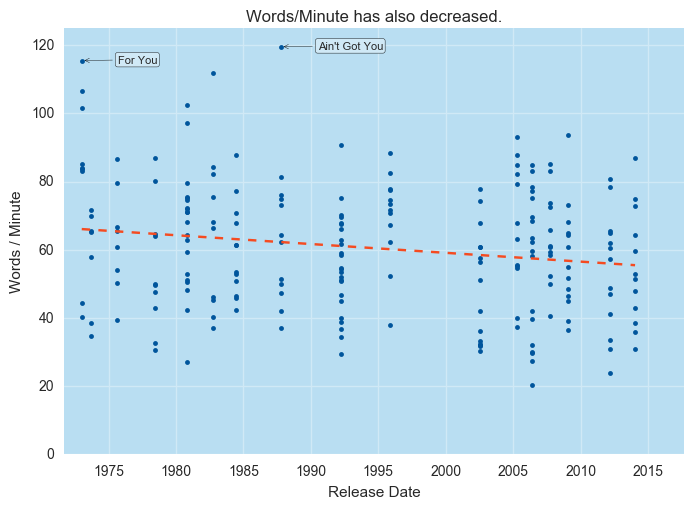

In [13]:
fig3 = plt.figure(3)
ax3 = fig3.add_subplot(111, axisbg='#b9def2')
ax3.grid(color = '#d0e9f6')
ax3.plot_date(new_material.loc[:,'date_number'], words_per_minute_nm, color = '#00559c', marker = '.')
plt.xlim(1972*365, 2018*365); plt.ylim(0,125)

m4,b4 = np.polyfit(date_number_nm, words_per_minute_nm, 1)
plt.plot(date_number_nm, m4*date_number_nm + b4, color = '#F54B21', linestyle = '--')

plt.title('Words/Minute has also decreased.')
pylab.xlabel('Release Date'); pylab.ylabel('Words / Minute')

plt.annotate('Ain\'t Got You', xy=(date_number_nm[76],words_per_minute_nm[76]), 
             xytext=(50,-3), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))
plt.annotate('For You', xy=(date_number_nm[6],words_per_minute_nm[6]), 
             xytext=(40,-3), fontsize=8, textcoords='offset points', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.20', fc='#d0e9f6', alpha=1),
             arrowprops=dict(facecolor='black', connectionstyle='arc3, rad=0', arrowstyle='->'))

plt.show()